# PARTIE 2: Modélisation
##### Dataset "Training_dataset.csv" généré par Charles

In [2]:
#Chargement des bibliothèques PYTHON
import warnings
warnings.filterwarnings('ignore')


import json
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder

#Sélection des features
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV,SelectPercentile

# Modèle de classification que l'on va utiliser
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split ,StratifiedKFold,cross_val_score

# Pour évaluer nos modèles
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

### I - CHARGEMENT DU DATASET

In [3]:
#import du dataset initialement au format CSV
df = pd.read_csv("C:/Users/gmari/.vscode/data_formatted/training_dataset_init.csv",low_memory=False) 
#affichage de la dimension du dataset chargée
print(df.shape)
#Affichage des 2 premières lignes
display(df.head(2))

(51981, 36)


,index,match_id,match_date,match_round_order,match_order,player1_name,player1_weight,player1_height,player1_birthdate,player1_turned_pro,player1_atprank,player1_oddsB365,player1_oddsPS,player2_name,player2_weight,player2_height,player2_birthdate,player2_turned_pro,player2_atprank,player2_oddsB365,player2_oddsPS,winner_player1,player1_plays,player1_wins,player1_losses,player1_age,player1_mean_serve_rating,player1_mean_atp_adversary,player1_elo,player2_plays,player2_wins,player2_losses,player2_age,player2_mean_serve_rating,player2_mean_atp_adversary,player2_elo
0,3278,2001-580-ms094-1-34-h355-m655,2001-01-01,7,31,Nicolas Massu,80.0,183.0,1979-10-10,1997.0,87.0,NaN,NaN,Tommy Haas,84.0,188.0,1978-04-03,1996.0,23.0,NaN,NaN,0,0,0,0,21.229295,NaN,NaN,0.0,0,0,0,22.748802,NaN,NaN,0.0
1,3289,2001-580-ms070-1-24-m590-r397,2001-01-01,7,41,Alberto Martin,73.0,175.0,1978-08-20,1995.0,79.0,NaN,NaN,Olivier Rochus,65.0,168.0,1981-01-18,1999.0,74.0,NaN,NaN,1,0,0,0,22.368241,NaN,NaN,0.0,0,0,0,19.953457,NaN,NaN,0.0


In [4]:
#Affichage des info du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51981 entries, 0 to 51980
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       51981 non-null  int64  
 1   match_id                    51981 non-null  object 
 2   match_date                  51981 non-null  object 
 3   match_round_order           51981 non-null  int64  
 4   match_order                 51981 non-null  int64  
 5   player1_name                51981 non-null  object 
 6   player1_weight              51819 non-null  float64
 7   player1_height              51799 non-null  float64
 8   player1_birthdate           51968 non-null  object 
 9   player1_turned_pro          51441 non-null  float64
 10  player1_atprank             51981 non-null  float64
 11  player1_oddsB365            48019 non-null  float64
 12  player1_oddsPS              43318 non-null  float64
 13  player2_name                519

- Il existe des valeurs maquantes => une gestion des NAN est nécessaires
- Les variables date match_date, player1_birthdate, player2_birthdate sont de type object ==> Nous procérons dans ce qui suit au parsing du type de ces variables

In [5]:
#Affichage des statistiques descriptives de toutes les variables
df.describe()

,index,match_round_order,match_order,player1_weight,player1_height,player1_turned_pro,player1_atprank,player1_oddsB365,player1_oddsPS,player2_weight,player2_height,player2_turned_pro,player2_atprank,player2_oddsB365,player2_oddsPS,winner_player1,player1_plays,player1_wins,player1_losses,player1_age,player1_mean_serve_rating,player1_mean_atp_adversary,player1_elo,player2_plays,player2_wins,player2_losses,player2_age,player2_mean_serve_rating,player2_mean_atp_adversary,player2_elo
count,51981.000000,51981.000000,51981.000000,51819.000000,51799.000000,51441.000000,51981.000000,48019.000000,43318.000000,51826.000000,51820.000000,51456.000000,51981.000000,48018.000000,43318.000000,51981.000000,51981.000000,51981.000000,51981.000000,51968.000000,50018.000000,50165.000000,48712.000000,51981.000000,51981.000000,51981.000000,51972.000000,50014.000000,50173.000000,48721.000000
mean,44995.146419,4.815625,11.934130,80.806924,185.889554,2002.767228,75.879571,2.649314,2.942907,80.804114,185.931629,2002.767063,76.067352,2.645558,2.971378,0.500010,183.990458,105.866894,78.123564,26.701730,261.883543,77.216675,9552.438619,184.877590,106.527308,78.350282,26.728853,261.895130,77.111350,9467.380185
std,26110.267665,1.405391,12.895044,7.333589,8.178948,27.290217,104.005102,2.634090,3.767878,7.357999,8.139707,25.822532,101.706427,2.651314,3.973558,0.500005,188.100459,129.604067,69.809077,3.989718,12.136935,27.147426,23454.993696,189.478614,131.113184,69.786696,4.003806,12.226351,26.914708,23365.232270
min,3022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.972000,0.000000,0.000000,0.000000,0.000000,0.967000,1.000000,0.000000,0.000000,0.000000,0.000000,15.011636,186.000000,12.000000,-35100.000000,0.000000,0.000000,0.000000,15.436003,163.000000,9.500000,-37500.000000
25%,20135.000000,4.000000,3.000000,75.000000,183.000000,1999.000000,25.000000,1.400000,1.440000,75.000000,183.000000,1999.000000,25.000000,1.400000,1.444000,0.000000,43.000000,18.000000,23.000000,23.772758,253.932603,63.457563,-4860.000000,43.000000,19.000000,23.000000,23.791923,253.969091,63.556312,-4830.000000
50%,44103.000000,5.000000,8.000000,80.000000,185.000000,2002.000000,54.000000,1.830000,1.943000,80.000000,185.000000,2002.000000,54.000000,1.830000,1.950000,1.000000,123.000000,59.000000,59.000000,26.531143,261.265686,72.750000,1710.000000,123.000000,60.000000,59.000000,26.535250,261.261791,72.790854,1770.000000
75%,68104.000000,6.000000,15.000000,85.000000,191.000000,2007.000000,92.000000,2.750000,3.010000,85.000000,191.000000,2007.000000,92.000000,2.750000,3.040000,1.000000,265.000000,144.000000,115.000000,29.445585,269.016211,84.975000,17640.000000,266.000000,145.000000,116.000000,29.475702,269.003951,84.844102,17250.000000
max,90792.000000,10.000000,64.000000,110.000000,211.000000,2023.000000,4915.000000,67.000000,91.000000,110.000000,211.000000,2023.000000,3065.000000,67.000000,121.000000,1.000000,1157.000000,993.000000,415.000000,42.392882,309.166667,1037.750000,160380.000000,1160.000000,995.000000,414.000000,44.062971,308.486640,1003.500000,154380.000000


In [6]:
val_NaN=round(df.isnull().sum()/len(df),4)*100
val_NaN.sort_values(ascending = False)

player1_oddsPS                16.67
player2_oddsPS                16.67
player1_oddsB365               7.62
player2_oddsB365               7.62
player1_elo                    6.29
player2_elo                    6.27
player1_mean_serve_rating      3.78
player2_mean_serve_rating      3.78
player1_mean_atp_adversary     3.49
player2_mean_atp_adversary     3.48
player1_turned_pro             1.04
player2_turned_pro             1.01
player1_height                 0.35
player1_weight                 0.31
player2_height                 0.31
player2_weight                 0.30
player1_birthdate              0.03
player1_age                    0.03
player2_birthdate              0.02
player2_age                    0.02
player2_plays                  0.00
player1_losses                 0.00
player2_losses                 0.00
player2_wins                   0.00
index                          0.00
player1_wins                   0.00
player1_plays                  0.00
winner_player1              

Nous constatons que les variables n'ont pas pas , la même échelle, dans la sections suivantes nous procéderons à une standardisation

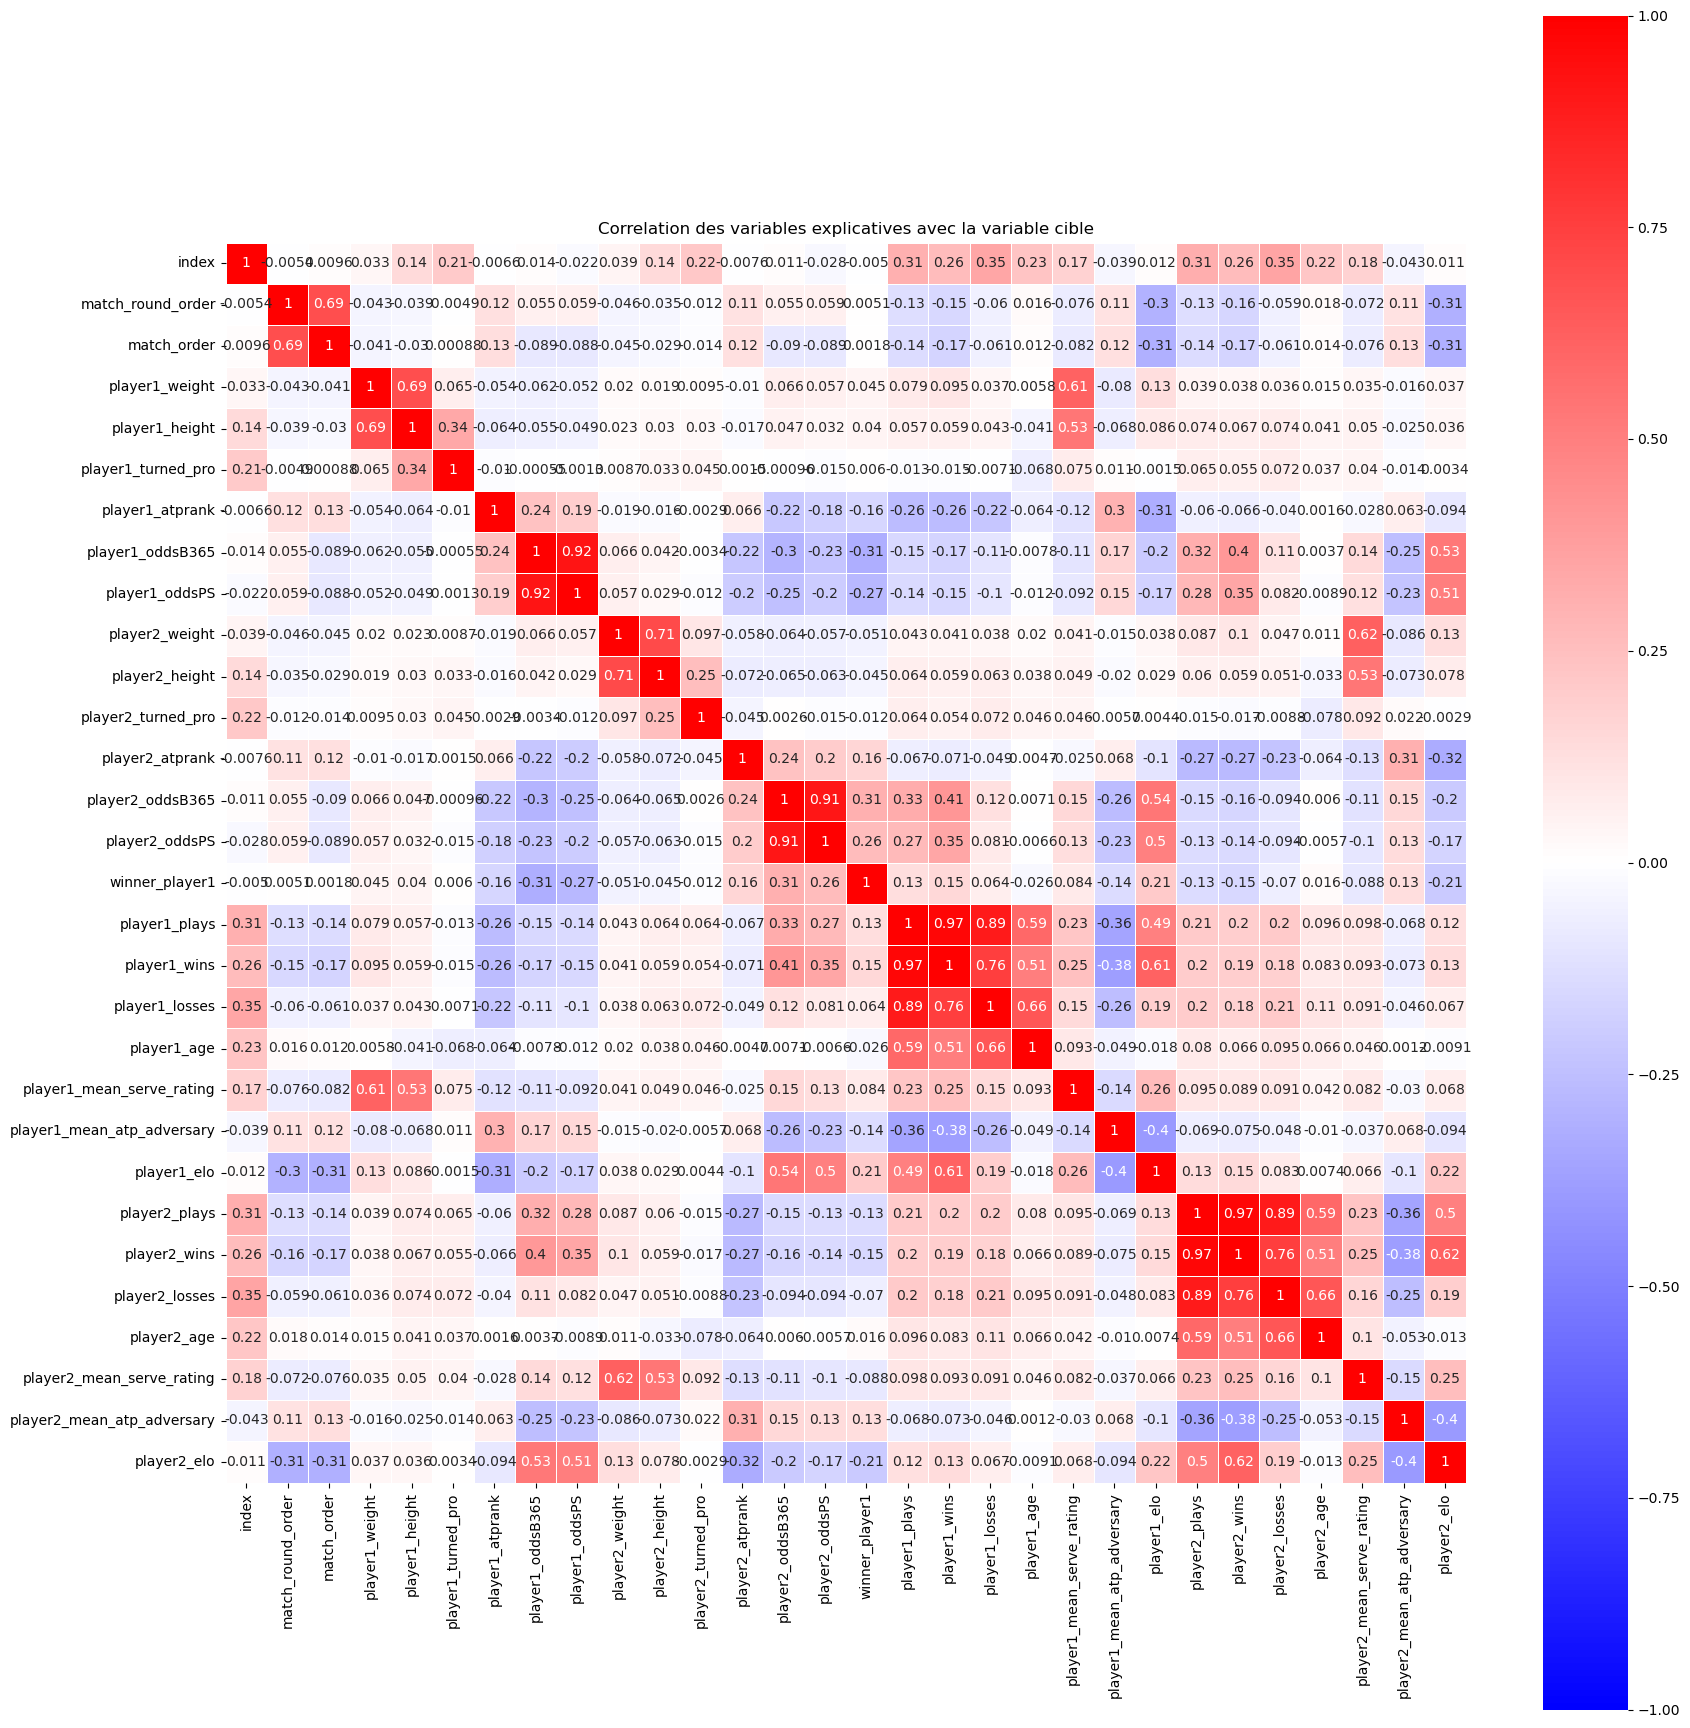

In [7]:
plt.figure(figsize=(20, 22))
plt.subplot(111)
plt.title('Correlation des variables explicatives avec la variable cible')
sns.heatmap(df.corr(), annot=True, cmap='bwr', vmin=-1, vmax=1, square=True, linewidths=0.5);

In [8]:
df.shape

(51981, 36)

### II - NETTOYAGE DES DONNEES & PREPROCESSING

In [9]:
#Parsing du type de la date du match "match_date" en datetime
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
dictionnaire = {'player1_birthdate':'datetime64',	
                'player2_birthdate':'datetime64'}	
df_new = df.astype(dictionnaire)
#création des variables year "année du match" et month "mois du match" pour faciliter plus tard le calcul de la moyenne mobile
df_new["year"] = df_new['match_date'].dt.year
df_new["month"] = df_new['match_date'].dt.month

#suppression det toute ligne ayant des valeurs manquates
df_new = df_new.dropna()

#nous retenons uniquement les données des joueurs ayant plus joué plus de 6 match ==> Pourquoi???
df_new = df_new[(df.player1_plays > 6) & (df.player2_plays>6)]
print(df_new.shape)
df_new.head(2)

(36972, 38)


,index,match_id,match_date,match_round_order,match_order,player1_name,player1_weight,player1_height,player1_birthdate,player1_turned_pro,player1_atprank,player1_oddsB365,player1_oddsPS,player2_name,player2_weight,player2_height,player2_birthdate,player2_turned_pro,player2_atprank,player2_oddsB365,player2_oddsPS,winner_player1,player1_plays,player1_wins,player1_losses,player1_age,player1_mean_serve_rating,player1_mean_atp_adversary,player1_elo,player2_plays,player2_wins,player2_losses,player2_age,player2_mean_serve_rating,player2_mean_atp_adversary,player2_elo,year,month
5672,11912,2004-451-ms031-1-15-y061-s636,2004-01-05,5,2,Mikhail Youzhny,73.0,183.0,1982-06-25,1999.0,43.0,2.875,3.25,Rainer Schuettler,74.0,180.0,1976-04-25,1995.0,6.0,1.364,1.385,1,91,45,46,21.530459,246.171443,63.571498,-3450.0,154,99,55,27.696099,250.744838,69.049495,49650.0,2004,1
5673,11917,2004-451-ms028-1-10-h336-s677,2004-01-05,5,7,David Sanchez,76.0,183.0,1978-04-20,1997.0,50.0,7.000,6.85,Tim Henman,77.0,185.0,1974-09-06,1993.0,15.0,1.083,1.131,0,79,33,46,25.711157,237.865260,80.798090,-4800.0,111,74,37,29.330595,261.610515,54.108108,16050.0,2004,1


#### Constitution des bases train et test

In [10]:

#Stockage toutes les features dans un nouveau dataframe nommé X.
X = df_new[[ "player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating", 
            "player1_height", "player1_weight", "player1_oddsB365",
         "player2_name","player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating", 
          "player2_height", "player2_weight", "player2_oddsB365",         "match_date"]]
#Stockage la variable cible "winner_player1" dans une variable y
y = df_new.winner_player1

#Création d'un ensemble d'entraînement et d'un ensemble de tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=101)

#### Normalisation des variables en fonction de leur nature

In [11]:
#suppression des variables non utiles pour la modélisation
col_to_drop = [ "match_date","player2_name","player1_name"]
X_train = X_train.drop(col_to_drop,axis=1)
X_test= X_test.drop(col_to_drop,axis=1)

#Pour les variables ayant des valeurs avec une étendue [0,1] ==> usage de la méthodes MinMax.
MinMax = MinMaxScaler()
col_to_minmax = ["player1_plays", "player1_wins", "player1_losses","player1_elo",
                       "player2_plays","player2_wins", "player2_losses", "player2_elo"]

X_train[col_to_minmax] = MinMax.fit_transform(X_train[col_to_minmax])
X_test[col_to_minmax] = MinMax.transform(X_test[col_to_minmax])

# Pour le reste des variables, nous utilisons la méthodes StandardScaler
scaler = StandardScaler()
col_to_std_scale = ["player1_age", "player1_atprank", "player1_elo", "player1_mean_serve_rating", "player1_height", "player1_weight", "player1_oddsB365",
         "player2_age", "player2_atprank", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",]

X_train[col_to_std_scale] = scaler.fit_transform(X_train[col_to_std_scale])
X_test[col_to_std_scale] = scaler.transform(X_test[col_to_std_scale])

X_train_scaler = pd.DataFrame(X_train)
X_test_scaler = pd.DataFrame(X_test)

### III - Modélisation

#### 1 - Validation croisée avec la méthode GridSearchCV: Régression logistique, Random Forest, SVM, KNN

##### Création d'une grille de recherche

In [12]:
#Instanciation des classifieurs
lr=LogisticRegression ( max_iter=2000,random_state=22)
rf=RandomForestClassifier (random_state=22,  n_jobs = -1)
knn=KNeighborsClassifier()


#paramètres des grilles
param_grid_lr = {'solver': ['Newton_cg ', 'lbfgs','sag','saga'], 'C': np.logspace(-4, 2, 9)}
param_grid_rf = [{'n_estimators': [ 250, 500, 1000],'min_samples_leaf': [1, 3],'max_features': ['sqrt', 'log2']}]
param_grid_knn = {'n_neighbors': list(range(2,41))}


#Créer un dictionnaire vide gridcvs.
gridcvs={}
#Instancier pour chaque paire de modèle et grille, un GridSearchCV 
#et l'enregistrer comme élément de gridcvs avec une clé correspondant au nom de l'algorithme utilisé.
for pgrid, clf, name in zip((param_grid_lr, param_grid_rf, param_grid_knn),
                            (lr, rf, knn),
                            ('LogisticRegression', 'RF', "KNN")):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit=True)
    gridcvs[name] = gcv


##### Regression logistique

In [13]:
#Entrainement du modèle + Calcul de la précision du meilleur modèle retenu
clf_lr = gridcvs['LogisticRegression']
clf_lr.fit(X_train_scaler, y_train)
print(f'Best Parameters: {clf_lr.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=clf_lr.predict(X_train_scaler))
test_acc = accuracy_score(y_true=y_test, y_pred=clf_lr.predict(X_test_scaler))
print(f'Training Accuracy Régression Logistique: {100*train_acc:.2f}')
print(f'Test Accuracy Régression Logistique: {100*test_acc:.2f}')

Best Parameters: {'C': 0.01778279410038923, 'solver': 'lbfgs'}
Training Accuracy Régression Logistique: 69.17
Test Accuracy Régression Logistique: 67.94


In [14]:
# ROI return of investment on all games - RL
pred_test=clf_lr.predict(X_test_scaler)
print("We bet 1€ on all test matches")
df_roi = X_test_scaler.copy()
df_roi["y_predict"] = pred_test
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[pred_test == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.player2_oddsB365
    else:
        money_won += row.player1_oddsB365

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 7395 €


money won: -2444.96 €
TOTAL: -9839.96 €


##### Random Forest

In [15]:
##Entrainement du modèle + Calcul de la précision du meilleur modèle retenu
clf_rf = gridcvs['RF']
clf_rf.fit(X_train_scaler, y_train)
print(f'Best Parameters: {clf_rf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=clf_rf.predict(X_train_scaler))
test_acc = accuracy_score(y_true=y_test, y_pred=clf_rf.predict(X_test_scaler))
print(f'Training Accuracy Random Forest: {100*train_acc:.2f}')
print(f'Test Accuracy Random Forest: {100*test_acc:.2f}')

Best Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 500}
Training Accuracy Random Forest: 97.82
Test Accuracy Random Forest: 66.86


In [16]:
# ROI return of investment on all games - RF
pred_test=clf_rf.predict(X_test_scaler)
print("We bet 1€ on all test matches")
df_roi = X_test_scaler.copy()
df_roi["y_predict"] = pred_test
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[pred_test == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.player2_oddsB365
    else:
        money_won += row.player1_oddsB365

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 7395 €
money won: -2394.61 €
TOTAL: -9789.61 €


In [17]:
##Entrainement du modèle + Calcul de la précision du meilleur modèle retenu
clf_knn = gridcvs['KNN']
clf_knn.fit(X_train_scaler, y_train)

print(f'Best Parameters: {clf_knn.best_params_}')

print ("score du modèle sur l'échantillon train: ", clf_knn.score(X_train_scaler, y_train))
print ("score du modèle sur l'échantillon test: ", clf_knn.score(X_test_scaler, y_test))

Best Parameters: {'n_neighbors': 40}
score du modèle sur l'échantillon train:  0.686817459512459
score du modèle sur l'échantillon test:  0.6530087897227856


In [18]:
# ROI return of investment on all games - KNN
pred_test=clf_knn.predict(X_test_scaler)
print("We bet 1€ on all test matches")
df_roi = X_test_scaler.copy()
df_roi["y_predict"] = pred_test
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[pred_test == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.player2_oddsB365
    else:
        money_won += row.player1_oddsB365

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 7395 €
money won: -2244.25 €
TOTAL: -9639.25 €


##### 2 - SVM

In [19]:
###Entrainement du modèle + Calcul de la précision du meilleur modèle retenu
svm=SVC(C=1000.0 ,gamma=0.002154434690031882,kernel='rbf',random_state=22)
svm.fit(X_train_scaler, y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=svm.predict(X_train_scaler))
test_acc = accuracy_score(y_true=y_test, y_pred=svm.predict(X_test_scaler))
print(f'Training Accuracy SVM: {100*train_acc:.2f}')
print(f'Test Accuracy SVM: {100*test_acc:.2f}')


Training Accuracy SVM: 69.38
Test Accuracy SVM: 67.90


In [20]:
# ROI return of investment on all games - SVM
pred_test=svm.predict(X_test_scaler)
print("We bet 1€ on all test matches")
df_roi = X_test_scaler.copy()
df_roi["y_predict"] = pred_test
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[pred_test == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.player2_oddsB365
    else:
        money_won += row.player1_oddsB365

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")


We bet 1€ on all test matches
money spent: 7395 €
money won: -2440.25 €
TOTAL: -9835.25 €


#### 3 - Arbre de décision

In [21]:
#Arbre de décision
from sklearn.tree import DecisionTreeClassifier
#Arbre de décision
from sklearn.tree import DecisionTreeClassifier
#instanciation du classifieur
tree_clf = DecisionTreeClassifier(criterion ='entropy', max_depth=3, random_state=123)

#entrainement du modèle
tree_clf.fit(X_train_scaler, y_train)

#print("Validation Mean F1 Score: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean())

print("Validation Mean Accuracy Train: ", cross_val_score(tree_clf, X_train_scaler, y_train, cv=5, scoring='accuracy').mean())
print("Validation Mean Accuracy Test: ", cross_val_score(tree_clf, X_test_scaler, y_test, cv=5, scoring='accuracy').mean())



Validation Mean Accuracy Train:  0.689386914120882
Validation Mean Accuracy Test:  0.6724814063556457


In [22]:
# ROI return of investment on all games - Decision Tree
pred_test=tree_clf.predict(X_test_scaler)
print("We bet 1€ on all test matches")
df_roi = X_test_scaler.copy()
df_roi["y_predict"] = pred_test
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[pred_test == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.player2_oddsB365
    else:
        money_won += row.player1_oddsB365

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 7395 €
money won: -2455.06 €
TOTAL: -9850.06 €


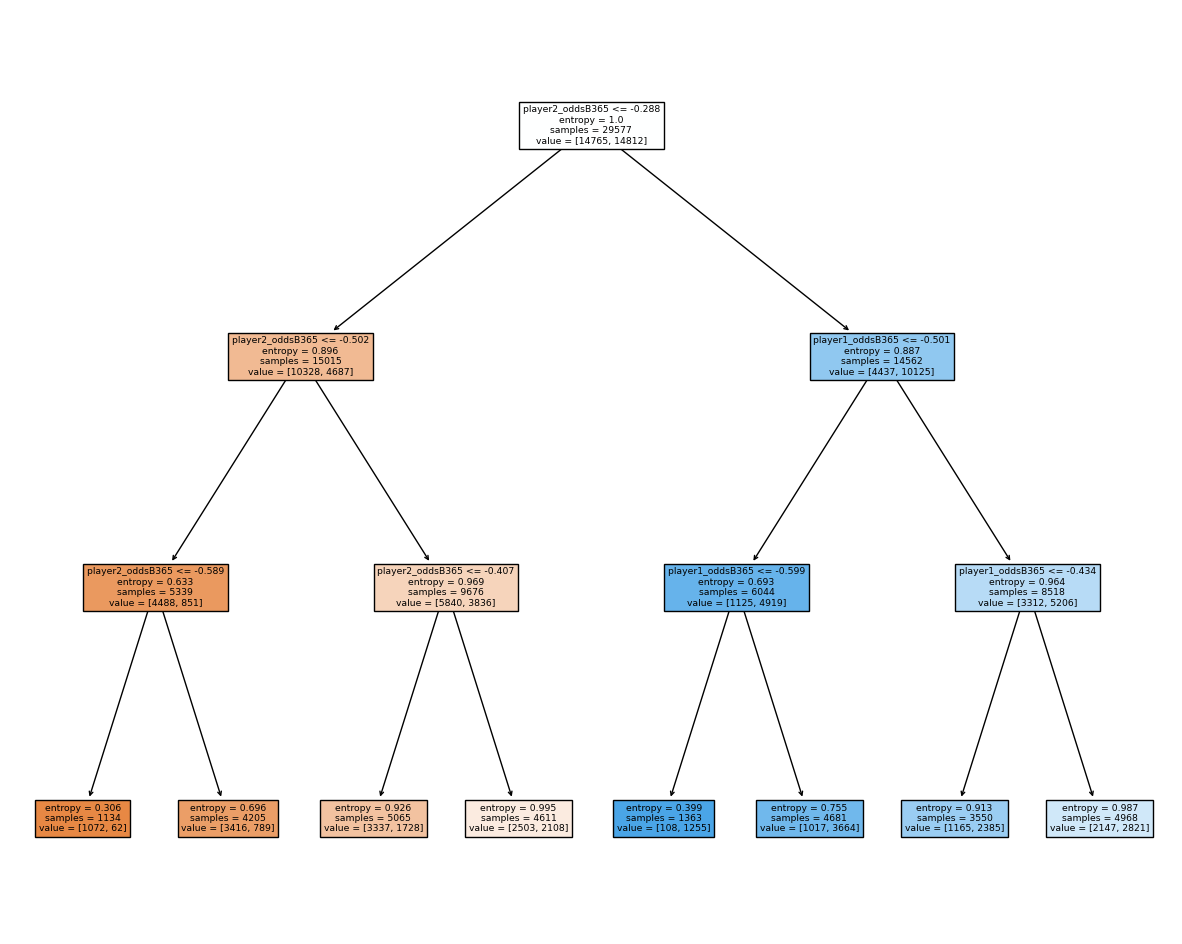

In [23]:
#technique d'interprétabilité traditionnel
from sklearn.tree import plot_tree

plt.figure(figsize=(15,12))
plot_tree(tree_clf, feature_names = X_train_scaler.columns.tolist(), filled=True); #proportion=True

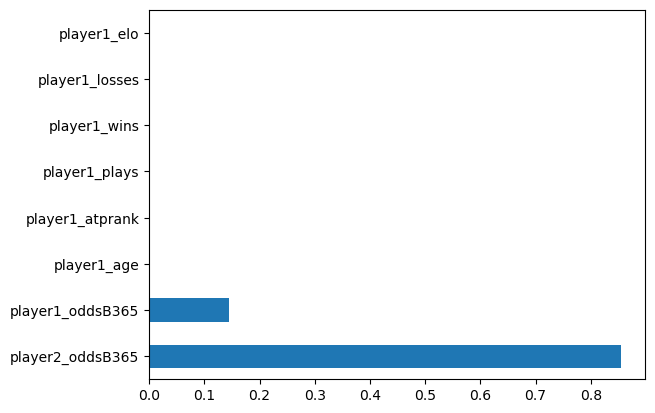

In [24]:
# feature importance est calculée comme la diminution de l'impureté de chaque noeud où la feature est présente, pondéré par la probabilité d'atteindre ce noeud
#La probabilité d'atteindre le noeud peut être calculée par le nombre d'échantillons qui atteignent le noeud, divisé par le nombre total d'échantillons.
#Plus cette valeur est élevée, plus la variable est considérée importante pour le modèle
feat_importances = pd.Series(
    tree_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh');

In [25]:
feats = {}
for feature, importance in zip(X_train_scaler.columns, tree_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(8)

,Importance
player2_oddsB365,0.855607
player1_oddsB365,0.144393
player2_atprank,0.000000
player2_weight,0.000000
player2_height,0.000000
player2_mean_serve_rating,0.000000
player2_elo,0.000000
player2_losses,0.000000


#### 4 - Entrainement du modèle retenu sur les données réduites 

##### Sélection de features

Text(0.5, 0, 'Feature selection')

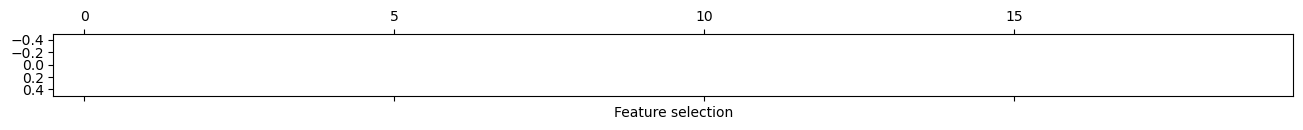

In [26]:
#Ajuster ce sélecteur VarianceThreshold appelé sel sur le jeu d'entrainement
sel=VarianceThreshold(threshold = 1e-06)
sel.fit(X_train_scaler,y_train)
#Récupérer le masque du sélecteur dans une variable mask.
mask=sel.get_support()
mask
#représentation des features conservées.
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection')

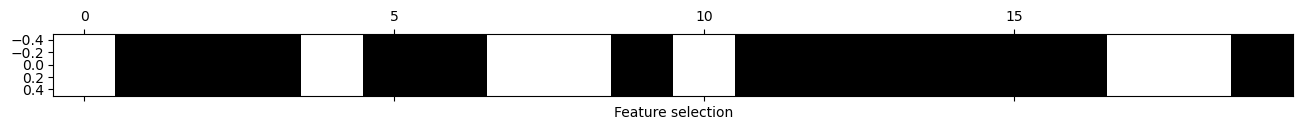

In [27]:
selKbest=SelectKBest(score_func = f_regression, k=13)
selKbest.fit(X_train_scaler,y_train)

X_train_kbest = selKbest.transform(X_train_scaler)
X_test_kbest = selKbest.transform(X_test_scaler)

#graphique des features selectionnées
maskkb=selKbest.get_support()
plt.matshow(maskkb.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection');

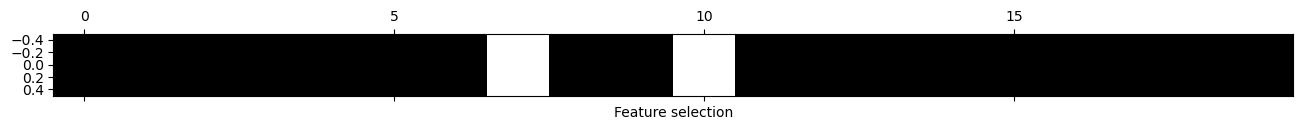

In [28]:
selPercentile= SelectPercentile(percentile = 90)
selPercentile.fit(X_train_scaler,y_train)

X_train_perc = selPercentile.transform(X_train_scaler)
X_test_perc = selPercentile.transform(X_test_scaler)

#graphique des features selectionnées
maskperc=selPercentile.get_support()
plt.matshow(maskperc.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection');

##### Comparaison des algo PCA, TSNE 

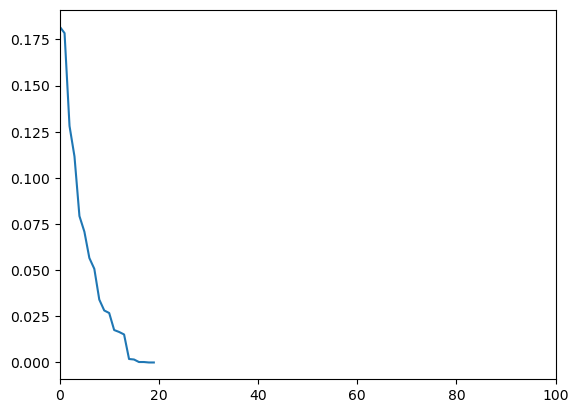

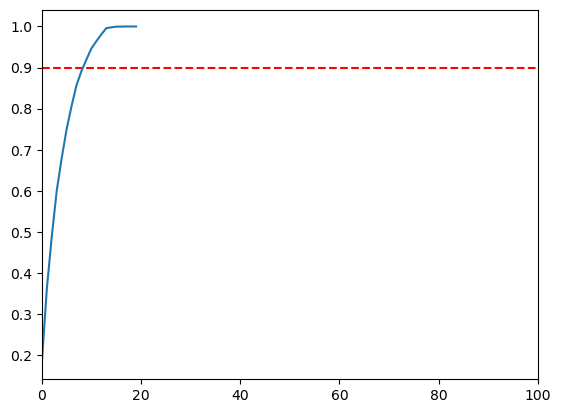

In [29]:
pca = PCA()
pca.fit(X_train_scaler)

plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,100)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [30]:
pca = PCA(n_components=0.9)
pca.fit(X_train_scaler)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 10


La part de variance expliquée est 0.36
(29577, 2)
(29577, 2)


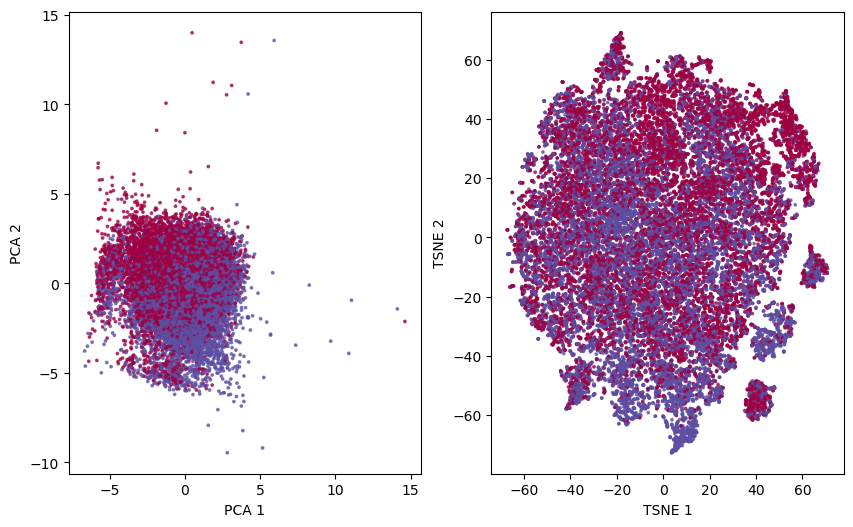

In [31]:
#En conservant 2 axes, effectuer une PCA et TSNE sur le jeu d'entrainement
#PCA
pca=PCA(n_components = 2)
data_2D=pca.fit_transform(X_train_scaler)
data_2D_test=pca.transform(X_test_scaler)
print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))
print (data_2D.shape)

#TSNE
tsne = TSNE(n_components=2, method = 'barnes_hut', n_jobs=-1)
dataTSNE = tsne.fit_transform(X_train_scaler)
print(dataTSNE.shape)


################   Données projetées sur les 2 axes pour PCA & TSNE ######################
#PCA
fig=plt.figure(figsize=(10,6));
ax = fig.add_subplot(121)
ax.scatter(data_2D[:, 0], data_2D[:, 1], c = y_train, cmap=plt.cm.Spectral, alpha = .7, s = 3)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

#TSNE
ax2 = fig.add_subplot(122)
ax2.scatter(dataTSNE[:, 0], dataTSNE[:, 1],  c = y_train, cmap=plt.cm.Spectral, alpha = .7, s = 3)
ax2.set_xlabel('TSNE 1')
ax2.set_ylabel('TSNE 2');
#ax2.set_title("Données projetées sur les 2 axes pour PCA & TSNE ");
#plt.show();


L’algorithme t-SNE permet d’identifier la présence de structure mais reste moins performant que la PCA 

In [32]:
#####Compéraison de la perf données réduites par PCS vs TSNE
#Modèle retenu
rl=LogisticRegression( max_iter=2000,random_state=22, C=0.01778279410038923, solver='lbfgs') 

#Modèle RL avec réduction de dimension PCA
rl.fit(data_2D, y_train)
train_acc_pca = accuracy_score(y_true=y_train, y_pred=rl.predict(data_2D))
print(f'Training Accuracy PCA: {100*train_acc_pca:.2f}')

# Modèle SVM avec réduction de dimension TSNE
rl.fit(dataTSNE, y_train)

train_acc_tsne = accuracy_score(y_true=y_train, y_pred=rl.predict(dataTSNE))
print(f'Training Accuracy TSNE: {100*train_acc_tsne:.2f}')

Training Accuracy PCA: 62.00
Training Accuracy TSNE: 59.90


LA réduction de dimension ne permet pas d'améliorer la performance du modèle logit retenu

##### Entrainement de l'algo PCA couplé aux sélecteurs de features (KbestSelect et PercentileSelect) 

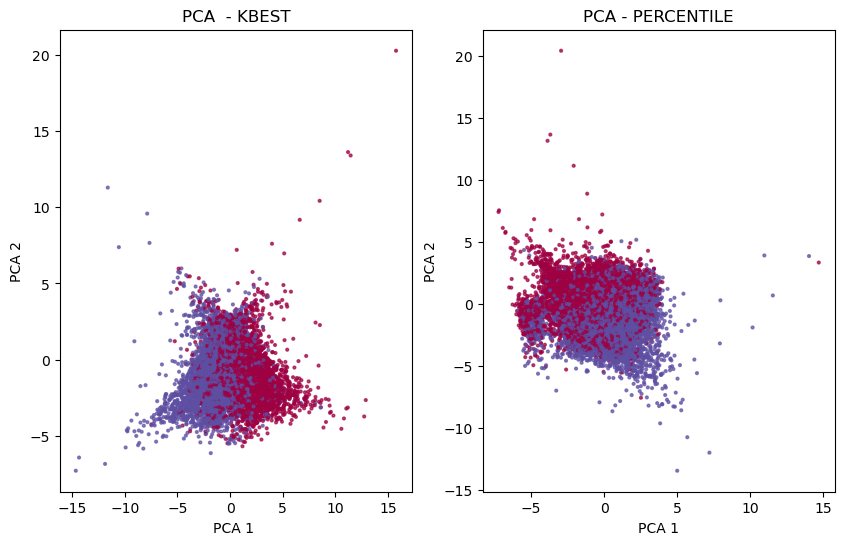

In [33]:
#Entrainement de l'algo PCA couplé aux sélecteurs de features (KbestSelect et PercentileSelect)
pca_kbest = pca.fit_transform(X_train_kbest)

pca_perc = pca.fit_transform(X_train_perc)

################   Données projetées sur les 2 axes pour  TSNE  en fonction des selecteurs de features ######################
fig=plt.figure(figsize=(10,6));
ax = fig.add_subplot(121)
ax.scatter(pca_kbest[:, 0], pca_kbest[:, 1],  c = y_train, cmap=plt.cm.Spectral, alpha = .7, s = 4)
ax.set_xlabel('PCA 1 ')
ax.set_ylabel('PCA 2');
ax.set_title("PCA  - KBEST");

ax2 = fig.add_subplot(122)
ax2.scatter(pca_perc[:, 0], pca_perc[:, 1],  c = y_train, cmap=plt.cm.Spectral, alpha = .7, s = 4)
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_title("PCA - PERCENTILE");
#plt.show();

In [34]:
rl.fit(pca_kbest, y_train)
train_acc_pca = accuracy_score(y_true=y_train, y_pred=rl.predict(pca_kbest))
print(f'Training Accuracy PCA: {100*train_acc_pca:.2f}')

rl.fit(pca_perc, y_train)
train_acc_pca = accuracy_score(y_true=y_train, y_pred=rl.predict(pca_perc))
print(f'Training Accuracy PCA: {100*train_acc_pca:.2f}')

Training Accuracy PCA: 67.26
Training Accuracy PCA: 64.73


La PCA couplée à au sélecteur SelectKBest, nous permet de distinguer deux classes. De plus, la performance du modèle est améliorée. 

#### 5 - Dense Neuronal Network pour données tabulaires

In [35]:
shape= X_train_scaler.shape
shape

(29577, 20)

In [36]:
## Insérez votre code ici
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
#nstancier une couche inputs
inputs = Input(shape = (shape[1]), name = "Input")

#Instancier une couche dense appelée dense1 avec 10 neurones
dense1 = Dense(units =80,  name = "Dense_1")

#Instancier une deuxième couche dense appelée dense2 avec 8 neurones
dense2 = Dense(units =50,  name = "Dense_2")

# Instancier une troisième couche dense appelée dense3 avec 6 neurones
dense3 = Dense(units =20,  name = "Dense_3")

# Instancier une quatrième couche dense appelée dense4 avec 2 neurones
dense4 = Dense(units=1, activation = "sigmoid", name = "Dense_4")   #sigmoid ou softmax

x=dense1(inputs)
x=dense2(x)
x=dense3(x)
outputs=dense4(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 20)]              0         
                                                                 
 Dense_1 (Dense)             (None, 80)                1680      
                                                                 
 Dense_2 (Dense)             (None, 50)                4050      
                                                                 
 Dense_3 (Dense)             (None, 20)                1020      
                                                                 
 Dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,771
Trainable params: 6,771
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
training_history=model.fit(X_train_scaler,y_train,epochs=26,batch_size=32,validation_split=0.1)

Epoch 1/26
832/832 [==============================] - 25s 23ms/step - loss: 0.5914 - accuracy: 0.6807 - val_loss: 0.5940 - val_accuracy: 0.6836
Epoch 2/26
832/832 [==============================] - 8s 9ms/step - loss: 0.5867 - accuracy: 0.6864 - val_loss: 0.5909 - val_accuracy: 0.6863
Epoch 3/26
832/832 [==============================] - 9s 11ms/step - loss: 0.5861 - accuracy: 0.6889 - val_loss: 0.5916 - val_accuracy: 0.6886
Epoch 4/26
832/832 [==============================] - 17s 20ms/step - loss: 0.5854 - accuracy: 0.6892 - val_loss: 0.5913 - val_accuracy: 0.6839
Epoch 5/26
832/832 [==============================] - 13s 16ms/step - loss: 0.5853 - accuracy: 0.6877 - val_loss: 0.5894 - val_accuracy: 0.6951
Epoch 6/26
832/832 [==============================] - 10s 12ms/step - loss: 0.5848 - accuracy: 0.6903 - val_loss: 0.5896 - val_accuracy: 0.6937
Epoch 7/26
832/832 [==============================] - 19s 22ms/step - loss: 0.5848 - accuracy: 0.6876 - val_loss: 0.5874 - val_accuracy: 0.

In [38]:
test_pred = model.predict(X_test_scaler)
y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

232/232 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      3735
           1       0.00      0.00      0.00      3660

    accuracy                           0.51      7395
   macro avg       0.25      0.50      0.34      7395
weighted avg       0.26      0.51      0.34      7395

[[3735    0]
 [3660    0]]


In [39]:
y_predict_train = model.predict(X_train_scaler)
y_predict = model.predict(X_test_scaler)

print('Accuracy :', accuracy_score(y_predict_train.round(), y_train))
print('Accuracy :', accuracy_score(y_predict.round(), y_test))

  1/925 [..............................] - ETA: 2:13

232/232 [==============================] - 4s 14ms/step
Accuracy : 0.6896575041417318
Accuracy : 0.6796484110885733


In [40]:
#Calcul du ROI
df_roi = X_test_scaler.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

#df_roi= df_roi.loc[df_roi["y_predict_proba"]>0.8]

money_invested=df_roi.shape[0]

money_won = 0.0
for index, row in df_roi.iterrows():
    if row.y_predict == row.y_test :
        if row.y_predict == 0 :
            money_won += row.player2_oddsB365
        else:
            money_won += row.player1_oddsB365

print("money spent:", money_invested,"€")
print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")

money spent: 7395 €
money won: -2437.33 €
TOTAL: -9832.33 €
ROI: -32.96 %


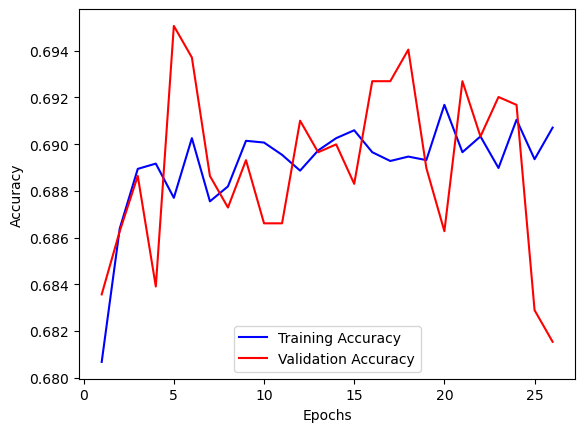

In [41]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 27, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de test
plt.plot(np.arange(1 , 27, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

#### 5 - Entrainement du modèle retenu sur des données auxquelles on a appliquées une moyenne mobile sur 3 mois, 12 mois

In [42]:
#Ordonancement des variables
df_new3=df_new[['index','match_id','match_date','year','month','match_round_order','match_order','winner_player1',
               'player1_name','player1_age','player1_weight','player1_height','player1_birthdate','player1_turned_pro','player1_atprank','player1_oddsB365','player1_oddsPS','player1_plays','player1_wins','player1_losses','player1_mean_serve_rating','player1_mean_atp_adversary','player1_elo',
               'player2_name','player2_age','player2_weight','player2_height','player2_birthdate','player2_turned_pro','player2_atprank','player2_oddsB365','player2_oddsPS','player2_plays','player2_wins','player2_losses','player2_mean_serve_rating','player2_mean_atp_adversary','player2_elo']]

#Suppression des variables ne contribuant à 'entrainement du modèle
df_new3=df_new3.drop(['index','match_round_order','match_order'],axis=1)

#Calcul des statistiques des joueurs par mois
df_mensuel=df_new3.groupby(['year','month','player1_name','player2_name','winner_player1'], group_keys=False).mean()

In [43]:
#Moyenne mobile sur une fenêtre de 3 mois glissants
df_ma_3mois=df_mensuel.rolling(window = 3, center = True).mean()

#Moyenne mobile sur une fenêtre de 12 mois glissants
df_ma_12mois=df_mensuel.rolling(window = 3, center = True).mean()


In [44]:
#suppression des valeurs manquantes
df3_ma_without_na=df_ma_3mois.dropna()
df12_ma_without_na=df_ma_12mois.dropna()

#Transformation en DataFrame
df3_ma=df3_ma_without_na.reset_index()
df12_ma=df12_ma_without_na.reset_index()


In [45]:
#Statistiques descriptives
df3_ma.describe()

,year,month,winner_player1,player1_age,player1_weight,player1_height,player1_turned_pro,player1_atprank,player1_oddsB365,player1_oddsPS,player1_plays,player1_wins,player1_losses,player1_mean_serve_rating,player1_mean_atp_adversary,player1_elo,player2_age,player2_weight,player2_height,player2_turned_pro,player2_atprank,player2_oddsB365,player2_oddsPS,player2_plays,player2_wins,player2_losses,player2_mean_serve_rating,player2_mean_atp_adversary,player2_elo
count,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.00000
mean,2013.259101,5.438070,0.499496,27.165030,80.991859,186.299153,2004.128216,64.087760,2.601901,2.882593,215.964327,124.268989,91.695338,262.671106,76.045902,10852.533558,27.179010,81.021946,186.340158,2004.102785,64.067707,2.612833,2.899094,216.684723,124.916084,91.768640,262.732769,76.059554,10675.69227
std,5.720368,2.940574,0.500007,3.197913,5.912872,5.867240,5.688927,56.551164,1.519504,2.130847,159.064252,112.880516,56.956499,9.355547,16.452727,20278.597039,2.452615,4.293694,4.486746,5.303235,43.924716,1.829404,2.628167,124.978165,86.854093,45.408217,7.045574,12.867905,14616.96487
min,2004.000000,1.000000,0.000000,17.612594,64.000000,71.000000,1986.000000,1.000000,1.006667,1.010000,8.000000,1.000000,3.000000,210.630556,34.780556,-31520.000000,19.371663,66.000000,114.333333,1989.666667,1.333333,1.043333,1.035000,10.666667,3.000000,5.666667,231.814644,39.418558,-23190.00000
25%,2008.000000,3.000000,0.000000,24.958248,77.000000,183.000000,2000.000000,33.666667,1.713333,1.783833,100.000000,47.333333,48.333333,256.548794,66.127172,-2570.000000,25.471138,78.000000,183.666667,2000.333333,39.666667,1.676667,1.750000,121.333333,62.000000,56.333333,258.033840,68.048998,200.00000
50%,2013.000000,5.000000,0.000000,27.037189,80.666667,185.666667,2003.333333,55.666667,2.186667,2.293333,174.333333,91.000000,80.000000,262.104241,74.006728,5220.000000,27.112024,80.666667,186.333333,2003.333333,56.333333,2.103333,2.206667,191.000000,103.000000,85.000000,262.412230,74.302873,7720.00000
75%,2018.000000,8.000000,1.000000,29.274013,84.666667,189.666667,2007.666667,81.333333,2.953333,3.171833,291.000000,164.666667,123.000000,267.952139,83.327304,18580.000000,28.809491,83.666667,189.000000,2007.666667,77.000000,2.840000,3.036667,288.000000,165.666667,120.000000,266.912406,81.812482,17950.00000
max,2023.000000,12.000000,1.000000,41.768652,108.000000,211.000000,2021.000000,2786.333333,24.083333,32.996667,1149.000000,988.000000,415.000000,308.473158,462.688889,156380.000000,37.921059,102.333333,208.333333,2020.333333,1095.666667,34.433333,53.833333,1003.000000,855.333333,341.333333,297.523093,250.632875,111380.00000


In [46]:
#Statistiques descriptives
df12_ma.describe()

,year,month,winner_player1,player1_age,player1_weight,player1_height,player1_turned_pro,player1_atprank,player1_oddsB365,player1_oddsPS,player1_plays,player1_wins,player1_losses,player1_mean_serve_rating,player1_mean_atp_adversary,player1_elo,player2_age,player2_weight,player2_height,player2_turned_pro,player2_atprank,player2_oddsB365,player2_oddsPS,player2_plays,player2_wins,player2_losses,player2_mean_serve_rating,player2_mean_atp_adversary,player2_elo
count,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.00000
mean,2013.259101,5.438070,0.499496,27.165030,80.991859,186.299153,2004.128216,64.087760,2.601901,2.882593,215.964327,124.268989,91.695338,262.671106,76.045902,10852.533558,27.179010,81.021946,186.340158,2004.102785,64.067707,2.612833,2.899094,216.684723,124.916084,91.768640,262.732769,76.059554,10675.69227
std,5.720368,2.940574,0.500007,3.197913,5.912872,5.867240,5.688927,56.551164,1.519504,2.130847,159.064252,112.880516,56.956499,9.355547,16.452727,20278.597039,2.452615,4.293694,4.486746,5.303235,43.924716,1.829404,2.628167,124.978165,86.854093,45.408217,7.045574,12.867905,14616.96487
min,2004.000000,1.000000,0.000000,17.612594,64.000000,71.000000,1986.000000,1.000000,1.006667,1.010000,8.000000,1.000000,3.000000,210.630556,34.780556,-31520.000000,19.371663,66.000000,114.333333,1989.666667,1.333333,1.043333,1.035000,10.666667,3.000000,5.666667,231.814644,39.418558,-23190.00000
25%,2008.000000,3.000000,0.000000,24.958248,77.000000,183.000000,2000.000000,33.666667,1.713333,1.783833,100.000000,47.333333,48.333333,256.548794,66.127172,-2570.000000,25.471138,78.000000,183.666667,2000.333333,39.666667,1.676667,1.750000,121.333333,62.000000,56.333333,258.033840,68.048998,200.00000
50%,2013.000000,5.000000,0.000000,27.037189,80.666667,185.666667,2003.333333,55.666667,2.186667,2.293333,174.333333,91.000000,80.000000,262.104241,74.006728,5220.000000,27.112024,80.666667,186.333333,2003.333333,56.333333,2.103333,2.206667,191.000000,103.000000,85.000000,262.412230,74.302873,7720.00000
75%,2018.000000,8.000000,1.000000,29.274013,84.666667,189.666667,2007.666667,81.333333,2.953333,3.171833,291.000000,164.666667,123.000000,267.952139,83.327304,18580.000000,28.809491,83.666667,189.000000,2007.666667,77.000000,2.840000,3.036667,288.000000,165.666667,120.000000,266.912406,81.812482,17950.00000
max,2023.000000,12.000000,1.000000,41.768652,108.000000,211.000000,2021.000000,2786.333333,24.083333,32.996667,1149.000000,988.000000,415.000000,308.473158,462.688889,156380.000000,37.921059,102.333333,208.333333,2020.333333,1095.666667,34.433333,53.833333,1003.000000,855.333333,341.333333,297.523093,250.632875,111380.00000


In [47]:
#Constitution base train et test - Moyenne mobile sur 3 mois
X3_ma = df3_ma[["year","month","player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating",  "player1_height", "player1_weight", "player1_oddsB365",
         "player2_name","player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",
        "year", "month"]]
y3_ma = df3_ma.winner_player1

X3_train_ma, X3_test_ma, y3_train_ma, y3_test_ma = train_test_split(X3_ma, y3_ma, test_size=0.20,random_state=101)

#Constitution base train et test - Moyenne mobile sur 12 mois
X12_ma = df12_ma[["year","month","player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating",  "player1_height", "player1_weight", "player1_oddsB365",
         "player2_name","player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",
        "year", "month"]]
y12_ma = df12_ma.winner_player1

X12_train_ma, X12_test_ma, y12_train_ma, y12_test_ma = train_test_split(X12_ma, y12_ma, test_size=0.20,random_state=101)


In [48]:
#standardisation - Dataset Moyenne mobile 3 mois
col_to_drop = [ "year","month","player2_name","player1_name"]
X3_train_ma = X3_train_ma.drop(col_to_drop,axis=1)
X3_test_ma = X3_test_ma.drop(col_to_drop,axis=1)

MinMax = MinMaxScaler()
col_to_minmax_scale = ["player1_plays", "player1_wins", "player1_losses","player1_elo","player2_plays","player2_wins", "player2_losses", "player2_elo"]
X3_train_ma[col_to_minmax_scale] = scaler.fit_transform(X3_train_ma[col_to_minmax_scale])
X3_test_ma[col_to_minmax_scale] = scaler.transform(X3_test_ma[col_to_minmax_scale])

scaler = StandardScaler()
col_to_std_scale = ["player1_age", "player1_atprank", "player1_elo", "player1_mean_serve_rating", "player1_height", "player1_weight", "player1_oddsB365",
         "player2_age", "player2_atprank", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",]
X3_train_ma[col_to_std_scale] = scaler.fit_transform(X3_train_ma[col_to_std_scale])
X3_test_ma[col_to_std_scale] = scaler.transform(X3_test_ma[col_to_std_scale])

X3_train_ma_scaler = pd.DataFrame(X3_train_ma)
X3_test_ma_scaler = pd.DataFrame(X3_test_ma)

In [49]:
#standardisation - Dataset Moyenne mobile 12 mois
col_to_drop = [ "year","month","player2_name","player1_name"]
X12_train_ma = X12_train_ma.drop(col_to_drop,axis=1)
X12_test_ma = X12_test_ma.drop(col_to_drop,axis=1)

MinMax = MinMaxScaler()
col_to_minmax_scale = ["player1_plays", "player1_wins", "player1_losses","player1_elo","player2_plays","player2_wins", "player2_losses", "player2_elo"]
X12_train_ma[col_to_minmax_scale] = scaler.fit_transform(X12_train_ma[col_to_minmax_scale])
X12_test_ma[col_to_minmax_scale] = scaler.transform(X12_test_ma[col_to_minmax_scale])

scaler = StandardScaler()
col_to_std_scale = ["player1_age", "player1_atprank", "player1_elo", "player1_mean_serve_rating", "player1_height", "player1_weight", "player1_oddsB365",
         "player2_age", "player2_atprank", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",]
X12_train_ma[col_to_std_scale] = scaler.fit_transform(X12_train_ma[col_to_std_scale])
X12_test_ma[col_to_std_scale] = scaler.transform(X12_test_ma[col_to_std_scale])

X12_train_ma_scaler = pd.DataFrame(X12_train_ma)
X12_test_ma_scaler = pd.DataFrame(X12_test_ma)

In [50]:
#Entrainement du modèle Régression logistique 

c_rl = LogisticRegression(max_iter=2000,random_state=22, C=0.01778279410038923, solver='lbfgs') 
#3 mois glissants
c_rl.fit(X3_train_ma_scaler, y3_train_ma)
print(f'Training Accuracy Moyenne mobile 3 mois glissants: {100*accuracy_score(y_true=y3_train_ma, y_pred=c_rl.predict(X3_train_ma_scaler)):.2f}')
print(f'Test Accuracy Moyenne mobile 3 mois glissants: {100*accuracy_score(y_true=y3_test_ma, y_pred=c_rl.predict(X3_test_ma_scaler)):.2f}')

#12 mois glissants
c_rl.fit(X12_train_ma_scaler, y12_train_ma)
print(f'Training Accuracy Moyenne mobile 12 mois glissants: {100*accuracy_score(y_true=y12_train_ma, y_pred=c_rl.predict(X12_train_ma_scaler)):.2f}')
print(f'Test Accuracy Moyenne mobile 12 mois glissants: {100*accuracy_score(y_true=y12_test_ma, y_pred=c_rl.predict(X12_test_ma_scaler)):.2f}')

Training Accuracy Moyenne mobile 3 mois glissants: 61.35
Test Accuracy Moyenne mobile 3 mois glissants: 61.30
Training Accuracy Moyenne mobile 12 mois glissants: 61.35
Test Accuracy Moyenne mobile 12 mois glissants: 61.30


L’intégration de la temporalité avec la moyenne mobile n’améliore pas la performance. De plus, L’agrandissement de la taille de la fenêtre pour la moyenne mobile ne suffit pas pour améliorer la performance.   

In [51]:
# ROI return of investment on all games 
pred_test=c_rl.predict(X3_test_ma_scaler)
print("We bet 1€ on all test matches")
df_roi = X3_test_ma_scaler.copy()
df_roi["y_predict"] = pred_test
df_roi["y_test"]=y3_test_ma


money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[pred_test == y3_test_ma]).iterrows():
    if row.y_predict == 0 :
        money_won += row.player2_oddsB365
    else:
        money_won += row.player1_oddsB365

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 7346 €
money won: -2337.99 €
TOTAL: -9683.99 €


In [52]:
# ROI return of investment on all games 
pred_test=c_rl.predict(X12_test_ma_scaler)
print("We bet 1€ on all test matches")
df_roi = X12_test_ma_scaler.copy()
df_roi["y_predict"] = pred_test
df_roi["y_test"]=y12_test_ma

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[pred_test == y12_test_ma]).iterrows():
    if row.y_predict == 0 :
        money_won += row.player2_oddsB365
    else:
        money_won += row.player1_oddsB365

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 7346 €


money won: -2337.99 €
TOTAL: -9683.99 €


### IV - Modèle retenu

#### 1 - Matrice de corrélation et de la mésure de performance AUC

Classe prédite     0     1
Classe réelle             
0               1742  1993
1                536  3124


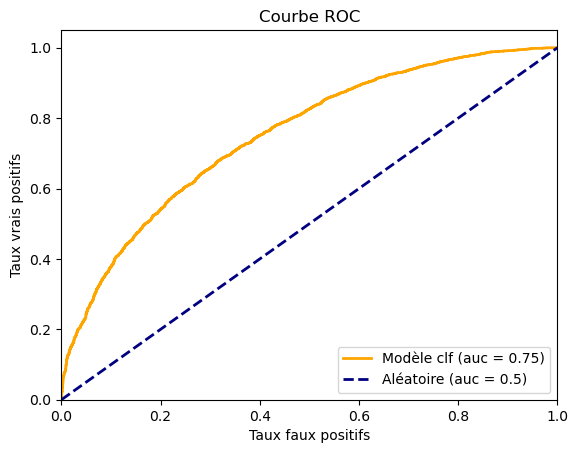

In [53]:
rl_opt=LogisticRegression ( max_iter=2000,random_state=22, C=0.01778279410038923, solver="lbfgs") 
model_lr= rl_opt.fit(X_train_scaler, y_train)


#tableau des  probabilités pour les joueurs  d'appartenir à la classe 0 ou la classe 1
probs = rl_opt.predict_proba(X_test_scaler)
y_preds = np.where(probs[:,1]>0.4,1,0)
#
cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm)

#courbe ROC  - outil très efficace pour évaluer d'un modèle
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils=roc_curve(y_test,probs[:,1] , pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();


#### 2- Interprétabilité  - Importance des features

<AxesSubplot:ylabel='Feature'>

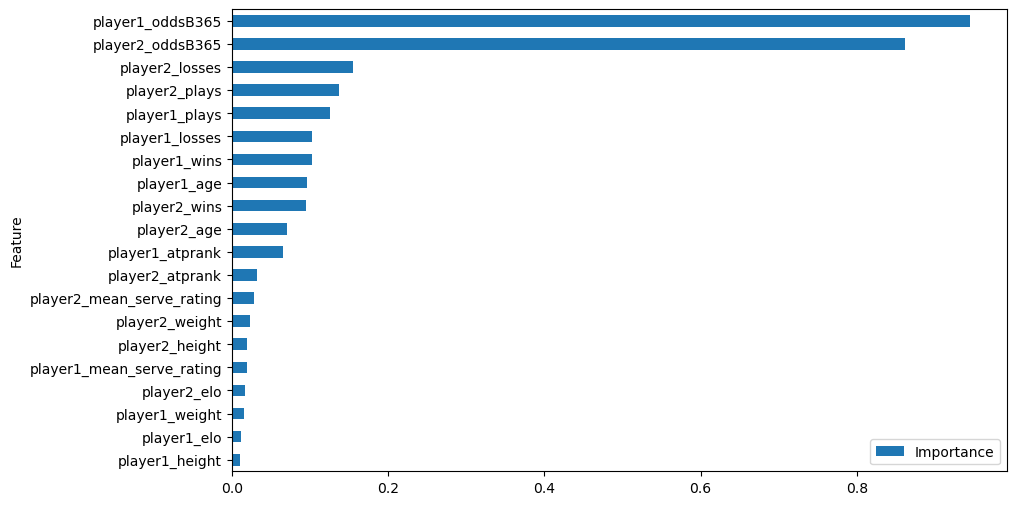

In [54]:
#Calcul de l'imporatnce des features
coefficients=rl_opt.coef_
avg_importance=np.mean(np.abs(coefficients), axis=0)

feature_importance=pd.DataFrame({'Feature':X_train_scaler.columns, 'Importance':avg_importance})
feature_importance=feature_importance.sort_values('Importance',ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10,6))


In [55]:

feature_importance.sort_values(by='Importance', ascending=False).head(8)

,Feature,Importance
9,player1_oddsB365,0.945039
19,player2_oddsB365,0.861842
14,player2_losses,0.154747
12,player2_plays,0.137298
2,player1_plays,0.125669
4,player1_losses,0.102976
3,player1_wins,0.102713
0,player1_age,0.096706


In [56]:

#importation de la librairie de calcul
import statsmodels as sm
#vérification de version
print(sm.__version__)
pd.DataFrame(np.concatenate([rl_opt.intercept_.reshape(-1,1),
                             rl_opt.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(X_train_scaler.columns)).T


0.13.2


,coef
constante,0.002186
player1_age,-0.096706
player1_atprank,-0.065764
player1_plays,0.125669
player1_wins,0.102713
player1_losses,0.102976
player1_elo,0.011323
player1_mean_serve_rating,0.019268
player1_height,0.009832
player1_weight,-0.015911


In [57]:
import statsmodels.api as sm
# on ajoute une colonne pour la constante
# on ajuste le modèle
model = sm.Logit(y_train, X_train_scaler)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.582487
         Iterations 7


In [58]:
#résumé des résultats
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         winner_player1   No. Observations:                29577
Model:                          Logit   Df Residuals:                    29558
Method:                           MLE   Df Model:                           18
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.1596
Time:                        19:18:58   Log-Likelihood:                -17228.
converged:                       True   LL-Null:                       -20501.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
player1_age                  -0.1046      0.020     -5.328      0.000      -0.143      -0.066
player1_atprank              -0.0579      0.019     -3.115      0.002      -0.094     

In [59]:
#Sélection automatique des variables
from sklearn.feature_selection import SequentialFeatureSelector
#méthode de selection backward en indiquant au sélecteur que l'on garde 13 variable
sfl= SequentialFeatureSelector(rl_opt,  direction='backward', n_features_to_select=13, n_jobs=-1)
sfl.fit(X_train_scaler, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(C=0.01778279410038923,
                                                       max_iter=2000,
                                                       random_state=22),
                          n_features_to_select=13, n_jobs=-1)

In [60]:
#liste des features
feature_names = X_train_scaler.columns
feature_names

Index(['player1_age', 'player1_atprank', 'player1_plays', 'player1_wins',
       'player1_losses', 'player1_elo', 'player1_mean_serve_rating',
       'player1_height', 'player1_weight', 'player1_oddsB365', 'player2_age',
       'player2_atprank', 'player2_plays', 'player2_wins', 'player2_losses',
       'player2_elo', 'player2_mean_serve_rating', 'player2_height',
       'player2_weight', 'player2_oddsB365'],
      dtype='object')

In [61]:
#Affichage du modèle avec les 13 variables
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfl.get_support()].tolist()}"
)

Features selected by forward sequential selection: ['player1_age', 'player1_atprank', 'player1_elo', 'player1_weight', 'player1_oddsB365', 'player2_age', 'player2_atprank', 'player2_plays', 'player2_wins', 'player2_losses', 'player2_height', 'player2_weight', 'player2_oddsB365']


In [62]:
#Nous retestons la significativité des 13 variables 
keep=['player1_age', 'player1_atprank', 'player1_elo', 'player1_weight', 'player1_oddsB365', 'player2_age', 'player2_atprank', 'player2_plays', 'player2_wins', 'player2_losses', 'player2_height', 'player2_weight', 'player2_oddsB365']
X_train_new=X_train_scaler[keep]
X_test_new=X_test_scaler[keep]
model = sm.Logit(y_train, X_train_new)
result = model.fit()

#résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.582700
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         winner_player1   No. Observations:                29577
Model:                          Logit   Df Residuals:                    29564
Method:                           MLE   Df Model:                           12
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.1593
Time:                        19:21:35   Log-Likelihood:                -17235.
converged:                       True   LL-Null:                       -20501.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
player1_age         -0.0631      0.013     -4.853      0.000      -0.089      -0.038
player1_atp

In [63]:
#Les variables player1_elo, player1_weight, player2_atprank, player2_weight, playe2_height n’étant pas significatives, nous allons les enlever du modèle manuellement 
#et retester un nouveau modèle avec le reste des variables. 
keep=['player1_age', 'player1_atprank',  'player1_oddsB365', 'player2_age',  'player2_plays', 'player2_wins', 'player2_losses',  'player2_oddsB365']

X_train_new=X_train_scaler[keep]
X_test_new=X_test_scaler[keep]
model = sm.Logit(y_train, X_train_new)
result = model.fit()
#résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.582797
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         winner_player1   No. Observations:                29577
Model:                          Logit   Df Residuals:                    29569
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.1592
Time:                        19:21:35   Log-Likelihood:                -17237.
converged:                       True   LL-Null:                       -20501.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
player1_age         -0.0627      0.013     -4.825      0.000      -0.088      -0.037
player1_atp

In [64]:
#Pour notre projet, nous retiendrons donc ce modèlem
rl_final=LogisticRegression ( max_iter=2000,random_state=22, C=0.01778279410038923, solver="lbfgs") 
rl_final.fit(X_train_new,y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=rl_final.predict(X_train_new))
test_acc = accuracy_score(y_true=y_test, y_pred=rl_final.predict(X_test_new))
print(f'Training Accuracy Régression Logistique: {100*train_acc:.2f}')
print(f'Test Accuracy Régression Logistique: {100*test_acc:.2f}')

Training Accuracy Régression Logistique: 69.12
Test Accuracy Régression Logistique: 67.61


La performance du modèle après sélection de variables non significative ainsi que le gain obtenu sont légèrement inférieures à ceux du modèle avec l’ensemble des variables du dataset de base.  

#### 3 - Interprétabilité du modèle à l’aide de l’arbre de décision (avec le modèle final après suppression des variables non significatives) 

Validation Mean Accuracy Train:  0.689386914120882
Validation Mean Accuracy Test:  0.6724814063556457


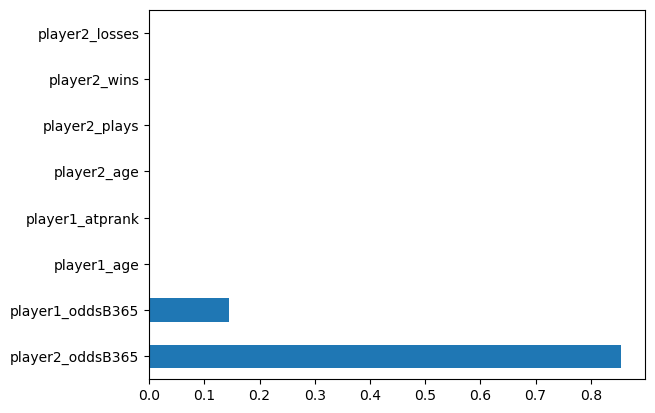

In [65]:
#Arbre de décision
tree_clf_final = DecisionTreeClassifier(criterion ='entropy', max_depth=3, random_state=123)

#entrainement du modèle
tree_clf_final.fit(X_train_new, y_train)

#print("Validation Mean F1 Score: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean())

print("Validation Mean Accuracy Train: ", cross_val_score(tree_clf_final, X_train_new, y_train, cv=5, scoring='accuracy').mean())
print("Validation Mean Accuracy Test: ", cross_val_score(tree_clf_final, X_test_new, y_test, cv=5, scoring='accuracy').mean())

feat_importances = pd.Series(tree_clf_final.feature_importances_, index=X_train_new.columns)
feature_importances=feat_importances.sort_values(ascending=True)
feat_importances.nlargest(8).plot(kind='barh');

In [66]:
#Importance des variables
feats = {}
for feature, importance in zip(X_train_new.columns, tree_clf_final.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(8)

,Importance
player2_oddsB365,0.855607
player1_oddsB365,0.144393
player1_age,0.000000
player1_atprank,0.000000
player2_age,0.000000
player2_plays,0.000000
player2_wins,0.000000
player2_losses,0.000000


L’arbre de décision suggère que les côtes du Bookmaker suffirait pour prédire le vainqueur du tournoi. 

#### 4 - Interprétabilité du modèle à l’aide du PCA (avec le modèle final après suppression des variables non significatives) 

(-0.8, 0.8)

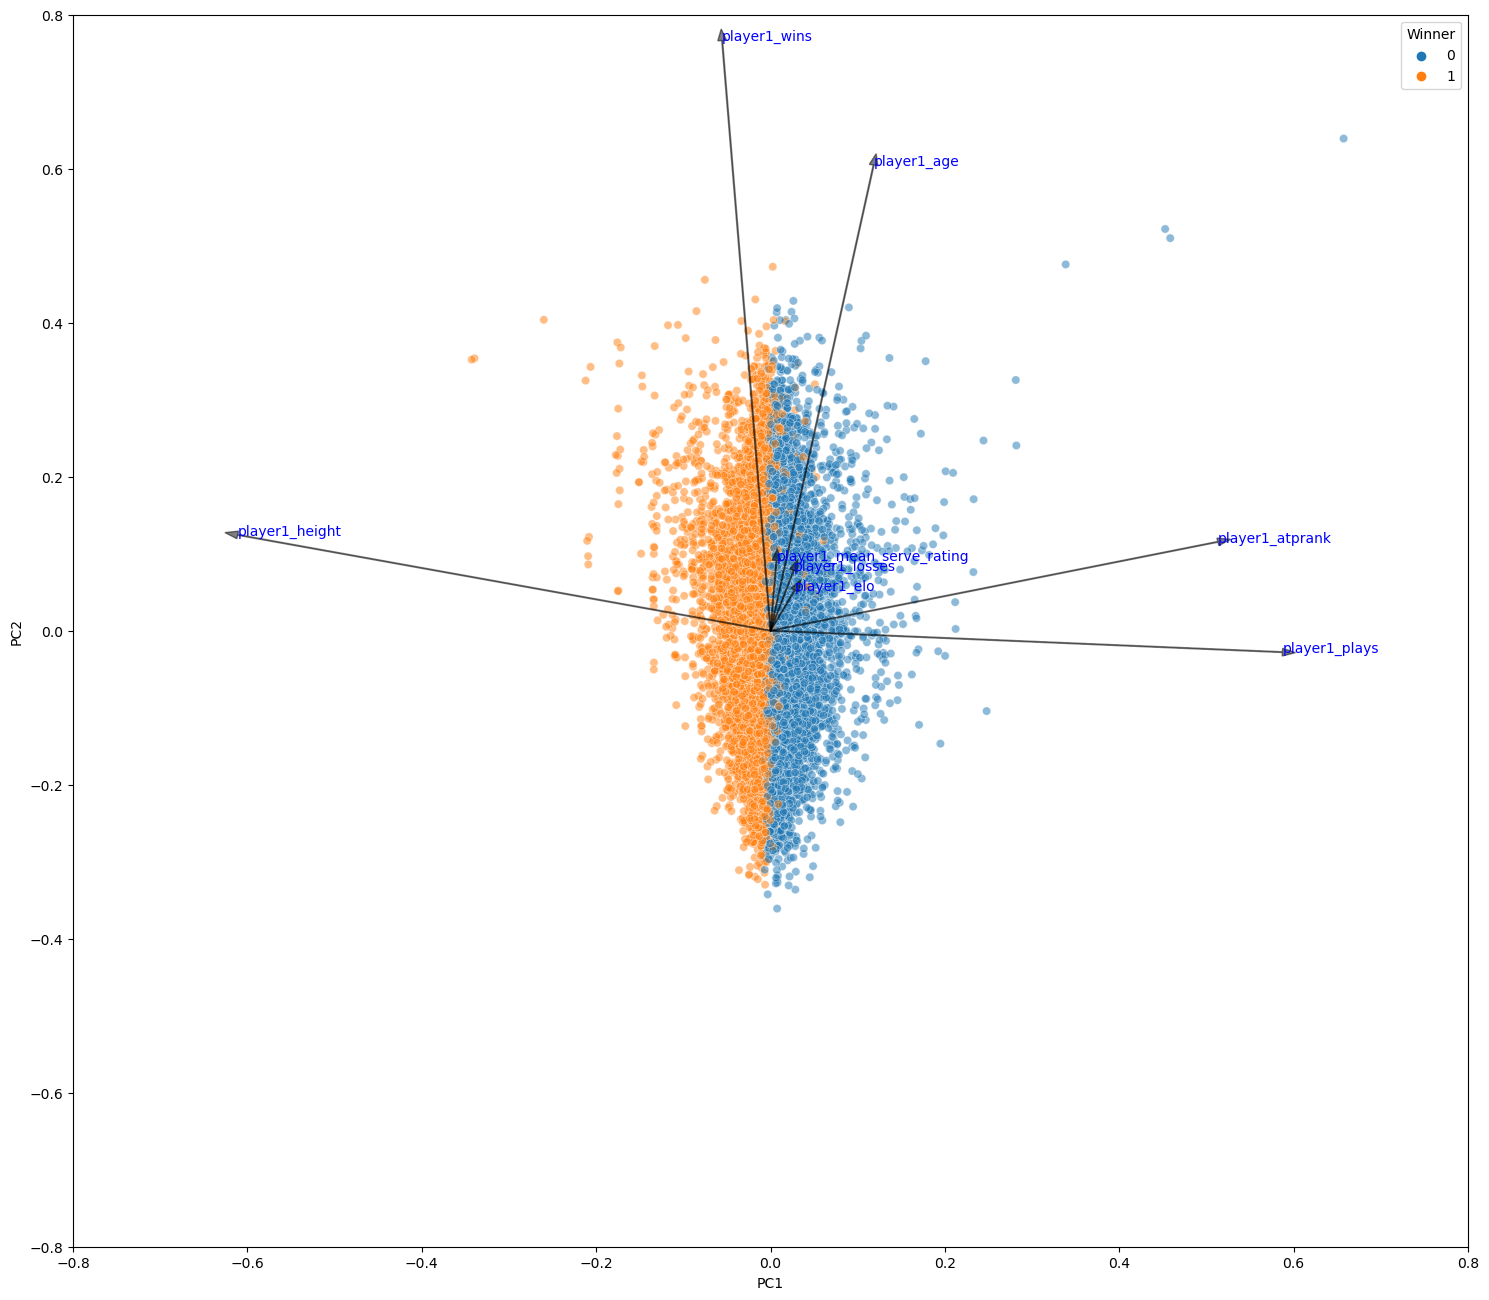

In [67]:
#Interprétabilité classique - PCA
n = X_train_new.shape[1]
pca=PCA(n_components = 2)
data_2D=pca.fit_transform(X_train_new)
data_2D_test=pca.transform(X_test_new)

coeff = pca.components_.transpose()
xs = data_2D[:, 0]
ys = data_2D[:, 1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

principalDf = pd.DataFrame({'PC1': xs*scalex, 'PC2': ys * scaley})
y_train_pred = rl_final.predict(X_train_new)
finalDF = pd.concat([principalDf, pd.Series(y_train_pred, name='Winner')], axis=1)

plt.figure(figsize=(18, 16))
sns.scatterplot(x='PC1', y='PC2', hue='Winner', data=finalDF, alpha=0.5)

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0]*1, coeff[i, 1]*1,  color='k', alpha=0.5,  head_width=0.01,)
    plt.text(coeff[i, 0]*1, coeff[i, 1] * 1, X_train_scaler.columns[i], color='blue')

plt.xlim(-0.8,0.8)
plt.ylim(-0.8, 0.8)

La modélisation du modèle ”Régression logistique” avec réduction de dimension par PCA nous permet de distinguer les 2 classes à prédire grâce à la 2ème composante principale (PCA2).  

#### 5 - Interprétabilité de type SHAP 

In [68]:
#pip install shap


In [69]:
#Interprétabilité SHARP
import shap

explainer = shap.LinearExplainer(rl_final,X_train_new,nsamples=1000, feature_perturbation=None)
shap_values = explainer.shap_values(X_test_new)

print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

Expected Value: 0.15890618949184104


,0,1,2,3,4,5,6,7
0,-0.092001,0.043168,0.257766,-0.086697,0.012729,0.006443,0.014594,-0.090611
1,0.072414,-0.025867,-1.518124,-0.086364,0.010942,0.003896,0.017758,-0.528936
2,0.096683,0.036514,0.150498,0.036945,0.018347,0.010431,0.017406,-0.220355
3,-0.008567,-0.018382,0.031310,0.086354,-0.055456,-0.029335,-0.059573,-0.339579
4,0.036915,0.026533,0.325306,0.002163,-0.001189,-0.000092,-0.002981,0.200437


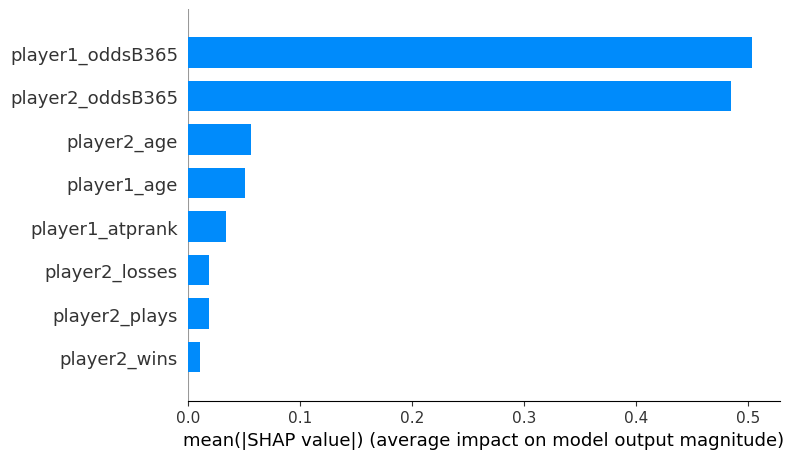

In [70]:
#Importance obteu avec SHARP
shap.summary_plot(shap_values, X_test_new, plot_type="bar")

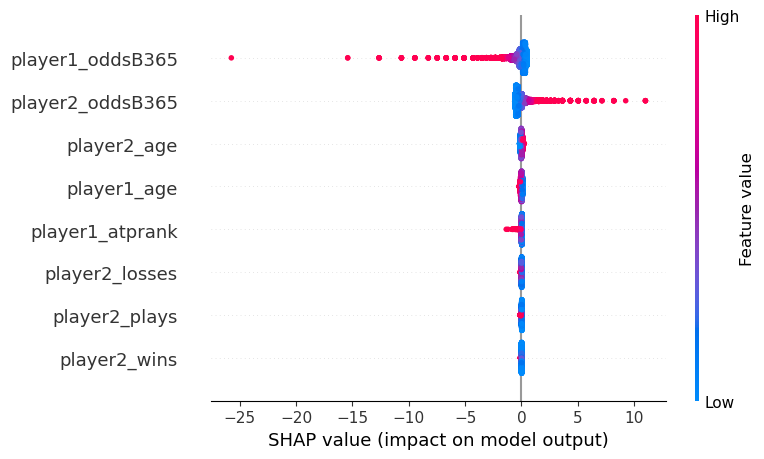

In [71]:
#Densité des valeurs sharp
shap.summary_plot(shap_values, X_test_new)

Les cotes, l’âge et le rang ATP des joueurs ont plus de poids lors de la prédiction du vainqueur du match (voir le graphique de densité à droite) 

In [72]:
#Interprétation pour quelques individus 
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[3,:], X_test_new.iloc[3,:])

shap.force_plot(explainer.expected_value, shap_values[233,:], X_test_new.iloc[233,:])

In [73]:
# Affichons le graphique interactif proposé par SHAP.
shap.force_plot(explainer.expected_value, shap_values[:1000], X_test_new[:1000])